# 이미지 변환

### 동차좌표와 어파인 변환
동차좌표는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다.  

### 강체변환
강체변환(rigid transform)은 유클리드 변환(Euclidean transformation)이라고도 불리우며, 회전(𝜃), 이동(𝑡) 두가지 요소만 사용하여 이미지를 변환한다.  

### 유사변환
유사변환(similarity transform)은 확대/축소(s), 회전(𝜃), 이동(𝑡) 세가지 요소를 사용하여 이미지를 변환한다.  

아래 코드는 90도 회전을 하고, x, y축으로 각 100씩 평행이동 후 이미지 크기를 반으로 줄이는 기능을 한다.  

변환행렬을 만들때는 cv2.getRotationMatrix2D 함수를 사용한다.  
getRotationMatrix2D(center, angle, scale)  
입력인수는 다음과 같다.
- center: 이미지의 중심 좌표
- angle: 회전 시키는 각도 𝜃(시계 반대방향)
- scale: 변환하려는 크기 비율 s  

주의할 점은 이론적으로는 사영행렬이 위식과 같이 3x3 행렬이지만, OpenCV에서는 마지막 행을 생략하고 3x2 변환행렬을 사용할 수 도 있다.  

변환행렬을 실제로 이미지에 적용하여 어파인 변환을 할 때는 warpAffine 함수를 사용한다.

In [11]:
import cv2
import skimage.data

img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 90도 회전, 크기는 70%
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)

H[:, 2] += 6

H


array([[ 4.2862638e-17,  7.0000000e-01,  8.2800000e+01],
       [-7.0000000e-01,  4.2862638e-17,  4.4120000e+02]])

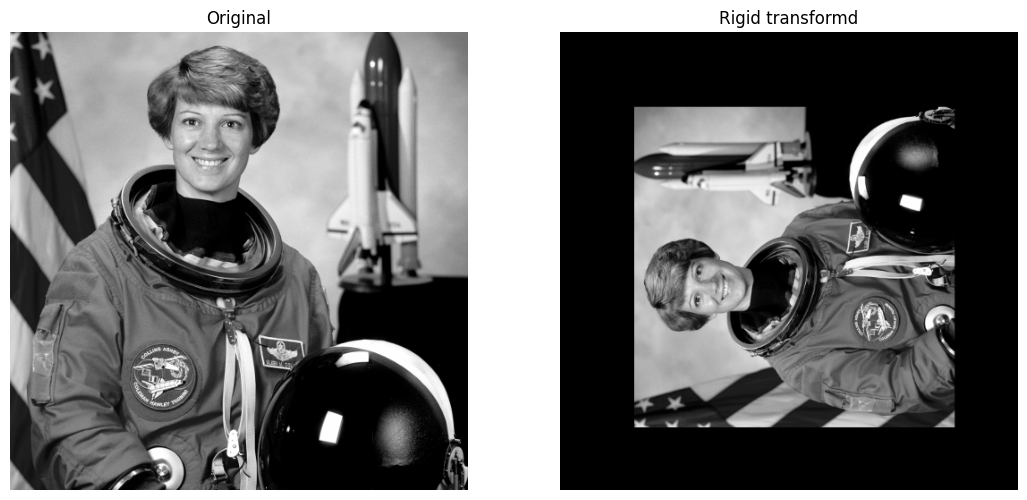

In [12]:
dst = cv2.warpAffine(img, H, (cols, rows))

import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)

ax2.set_title("Rigid transformd")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)

plt.show()